In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [8]:
pass_data = pd.read_csv('pass_data.csv')

In [9]:
pass_data.head()

,password,strength,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,kzde5577,1,NaN,NaN,NaN,NaN,NaN
1,kino3434,1,NaN,NaN,NaN,NaN,NaN
2,visi7k1yr,1,NaN,NaN,NaN,NaN,NaN
3,megzy123,1,NaN,NaN,NaN,NaN,NaN
4,lamborghin1,1,NaN,NaN,NaN,NaN,NaN


In [12]:
pass_data = pass_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis=1)

In [13]:
pass_data.shape

(1048574, 2)

In [14]:
pass_data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [15]:
# check missing values
pass_data.isna().sum()

password    2
strength    1
dtype: int64

In [16]:
pass_data.dropna(inplace=True)

In [17]:
pass_data.isna().sum()

password    0
strength    0
dtype: int64

In [18]:
# check uniqueness of Strength columns
pass_data['strength'].unique()

array(['1', '2', '0', 'delioreanxs@hotmail.com', 'mt2gurur@hotmail.com',
       'facebookselim4@hotmail.com', 'anakonda_252@hotmail.com',
       'mamedov.kenan@mail.ru', 'destek@migmedya.com',
       'elitebank44@gmail.com', 'memleketim.info@gmail.com',
       'canersastim@gmail.com', 'arifselim.ask@gmail.com',
       'octoberwind@mynet.com', 'sado_370@hotmail.com',
       'djexploit@gmail.com', 'bursabursa2@hotmail.com',
       'info@kayimoglu.com', 'drselimcelik@gmail.com',
       'bykudelfa@hotmail.com', 'kralkotsk@mynet.com',
       'mnyk12@hotmail.com', 'elitebilgisayar26@gmail.com',
       'elumre@gmail.com', 'selim.ozmen07@hotmail.com',
       'selimkaratas@windowslive.com', 'crazy_boeing@yahoo.com',
       'imkbticaretmeslek@gmail.com', 'mrcds.grmnt@yahoo.com',
       'mert_kaya09@hotmail.com', 'beratmisimi1@gmail.com',
       'cousto@live.com', 'boystreet04@gmail.com',
       'hackerbbqueen15@hotmail.com', 'brkyc3@hotmail.com',
       'bursa322@hotmail.com', 'selimcebecioglu@g

In [19]:
# the strength column contain unnecessary emails
# lets remove them

def clean_col(x):
    try:
        int(x)
    except Exception:
        return np.nan
    else:
        return x

In [20]:
pass_data['strength'] = pass_data['strength'].apply(lambda x: clean_col(x))

In [21]:
pass_data['strength'].unique()

array(['1', '2', '0', nan], dtype=object)

In [22]:
# check missing values again
pass_data.isna().sum()

password      0
strength    379
dtype: int64

In [23]:
# drop nan 
pass_data.dropna(inplace=True)

<AxesSubplot:xlabel='strength', ylabel='count'>

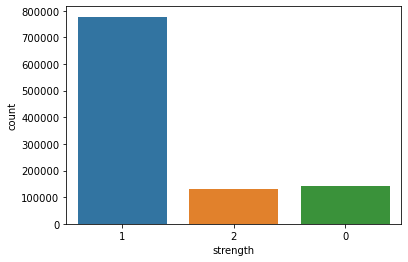

In [24]:
# visualize the strength column
import seaborn as sn
sn.countplot(pass_data['strength'])

The data is biased to 1

In [25]:
pass_data_tupple = np.array(pass_data)

In [26]:
pass_data_tupple

array([['kzde5577', '1'],
       ['kino3434', '1'],
       ['visi7k1yr', '1'],
       ...,
       ['5wrqbarbjisz', '1'],
       ['matimati1', '1'],
       ['vtugql2', '0']], dtype=object)

In [27]:
# shuffle the tupple
import random
random.shuffle(pass_data_tupple)

In [28]:
# separate the tupple
x = [label[0] for label in pass_data_tupple]
y = [label[1] for label in pass_data_tupple]

In [29]:
# password
x[:10]

['kzde5577',
 'kzde5577',
 'kzde5577',
 'megzy123',
 'visi7k1yr',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'AVYq1lDE4MgAZfNt',
 'megzy123',
 'megzy123']

In [30]:
y[:10]

['1', '1', '1', '1', '1', '1', '2', '2', '1', '1']

In [31]:
# function to split the characters in the password

def word_to_character(inputs):
    character = []
    for i in inputs:
        character.append(i)
    return character

In [32]:
word_to_character('megzy123')

['m', 'e', 'g', 'z', 'y', '1', '2', '3']

In [35]:
#first_doc = X[0]

In [36]:
#first_doc.T.todense()

In [34]:
# create dataframe for the password matrix
#df = pd.DataFrame(first_doc.T.todense(),index=vectorizer.get_feature_names_out(),columns=["TF-IDF"])

In [33]:
#df.sort_values(by=['TF-IDF'],ascending=False)

### TF-IDF

In [37]:
# split the data into train and test set
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=word_to_character)


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100,stratify=y)

In [39]:
#TF-IDF transform
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [40]:
x_train.T.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Build ML model to predict the strength of password

   ### 1. DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [42]:
dt_model = DecisionTreeClassifier()

In [43]:
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

In [44]:
print("Model score:",accuracy_score(y_test,dt_pred))
print("*****************************************************")
print("Classification Report: ")
print(classification_report(y_test,dt_pred))

Model score: 0.9810245231087728
*****************************************************
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     28194
           1       0.99      0.99      0.99    155440
           2       0.97      0.97      0.97     26005

    accuracy                           0.98    209639
   macro avg       0.97      0.97      0.97    209639
weighted avg       0.98      0.98      0.98    209639



In [46]:
import pickle
pickle.dump(dt_model,open("dt_model.pkl","wb"))
pickle.dump(vectorizer,open('tfidf_vectorizer.pkl','wb'))

In [47]:
new_pass = np.array(['00*123','awqwewoilfkvnropflr;)','(0H)@1s3123'])
pred = vectorizer.transform(new_pass)
dt_model.predict(pred)

array(['1', '2', '2'], dtype='<U1')

In [40]:
def check_pass_strength(pass_data):
    new_pass = np.array([pass_data])
    pred = vectorizer.transform(new_pass)
    result=dt_model.predict(pred)
    
    return result


In [43]:
check_pass_strength("02/drfe")

array(['1'], dtype='<U1')

In [41]:
check_pass_strength("!@Password12345")

array(['2'], dtype='<U1')

In [48]:
vec = pickle.load(open('tfidf_vectorizer.pkl','rb'))

In [53]:
text = "!@Password12345"
text_array = np.array([text])
tfidf =vec.transform(text_array)
dt_model.predict(tfidf)

array(['2'], dtype='<U1')